In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings(action='ignore')

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
base = './inno_data/02_카드매출데이터(신한카드)'

cs_rsdnt = pd.read_csv(base + '/CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt', sep='\t')
cs_frgnr = pd.read_csv(base + '/CARD_SPENDING_FOREIGNER/CARD_SPENDING_FOREIGNER.txt', sep='\t', encoding='CP949')

In [3]:
def to_datetime(df, col):
    if (df[col].dtypes == np.dtype(np.int32) or df[col].dtypes == np.dtype(np.int64)):
        df[col] = df[col].astype('str').astype('datetime64')        
    elif df[col].dtypes == np.dtype(np.object):
        df[col] = df[col].astype('datetime64')        
    else:
        print('Please check the data type again.')

In [4]:
to_datetime(cs_rsdnt, 'STD_DD')
to_datetime(cs_frgnr, 'STD_DD')

In [5]:
display(cs_rsdnt.head(3))
display(cs_frgnr.head(3))

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,2019-02-01,110,517,10,F,25,11,595
1,2019-02-01,110,517,10,F,50,5,243
2,2019-02-01,110,517,10,F,55,5,27


,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,COUNTRY_NM,USE_CNT,USE_AMT
0,2019-02-04,260,510,81,대만,2,30.0
1,2019-02-13,260,510,40,대만,2,32.0
2,2019-04-16,260,510,40,대만,2,16.0


<b> 결측값 존재

국가명에 '정보없음' 데이터 존재

In [6]:
cs_frgnr['COUNTRY_NM'].value_counts()

미국         51570
일본         24936
유럽         23703
중국         22320
미주         17692
아시아        15814
대만         13894
영국         12866
홍콩         10946
싱가폴         9660
중동/아프리카     8645
태국          7694
필리핀         6185
베트남         5271
프랑스         1346
독일          1321
캐나다         1119
오스트레일리아      943
카자흐스탄        773
정보없음         698
러시아          637
스웨덴          539
네덜란드         257
Name: COUNTRY_NM, dtype: int64

In [7]:
cs_rsdnt['DONG_CD'] = cs_rsdnt['GU_CD'].map(str) + cs_rsdnt['DONG_CD'].map(str)
cs_frgnr['DONG_CD'] = cs_frgnr['GU_CD'].map(str) + cs_frgnr['DONG_CD'].map(str)

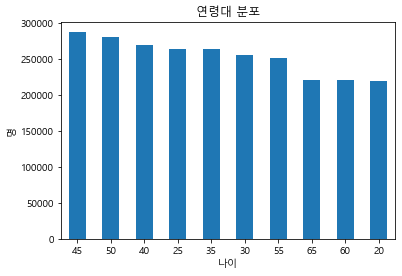

In [8]:
cs_rsdnt['AGE_CD'].value_counts().plot.bar(rot=0)
plt.title('연령대 분포')
plt.xlabel('나이')
plt.ylabel('명')
plt.show()

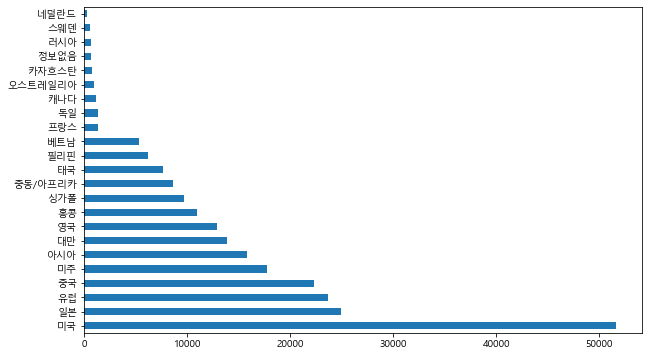

In [9]:
plt.figure(figsize=(10, 6))
cs_frgnr['COUNTRY_NM'].value_counts().plot.barh()
plt.show()

In [10]:
cnty_amt_2019 = cs_frgnr.query('STD_DD.dt.year == 2019').groupby('COUNTRY_NM')['USE_AMT'].sum()
cnty_amt_2020 = cs_frgnr.query('STD_DD.dt.year == 2020').groupby('COUNTRY_NM')['USE_AMT'].sum()

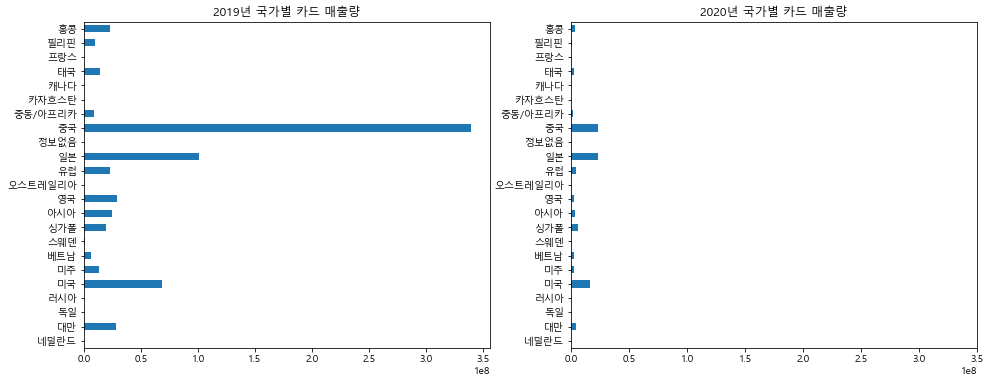

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

cnty_amt_2019.plot.barh(ax=ax[0])
cnty_amt_2020.plot.barh(ax=ax[1])

ax[1].set_xticks([x for x in range(0, 400000000, 50000000)])

for i in range(2):
    ax[i].set_title(f'{i+2019}년 국가별 카드 매출량')
    ax[i].set_ylabel('')
plt.show()

#와이즈넛 불러와야 범례 바꿀 수 있어!!!

In [15]:
path = './inno_data/03_SNS데이터(와이즈넛)/2020 bigcontest data_wisenut.csv'

wst = pd.read_csv(path, sep='')

In [16]:
wst['DONG_CD'] = wst['GU_CD'].map(str) + wst['DONG_CD'].map(str)

In [17]:
def code_dict(df, code, name):
    """
    code를 key로, name을 value로 하는 딕셔너리 생성함수
    """
    key = df[code].tolist()
    value = df[name].tolist()
    
    return {key[i]: value[i] for i in range(len(key))}

In [18]:
gu = code_dict(wst,'GU_NM(삭제)','GU_CD')
dng = code_dict(wst,'DONG_NM(삭제)','DONG_CD')

In [20]:
gu_age_rs19 = pd.pivot_table(cs_rsdnt.query('STD_DD.dt.year == 2019'),
                             values='USE_CNT',
                             index='GU_CD',
                             columns='AGE_CD',
                             aggfunc=np.sum)

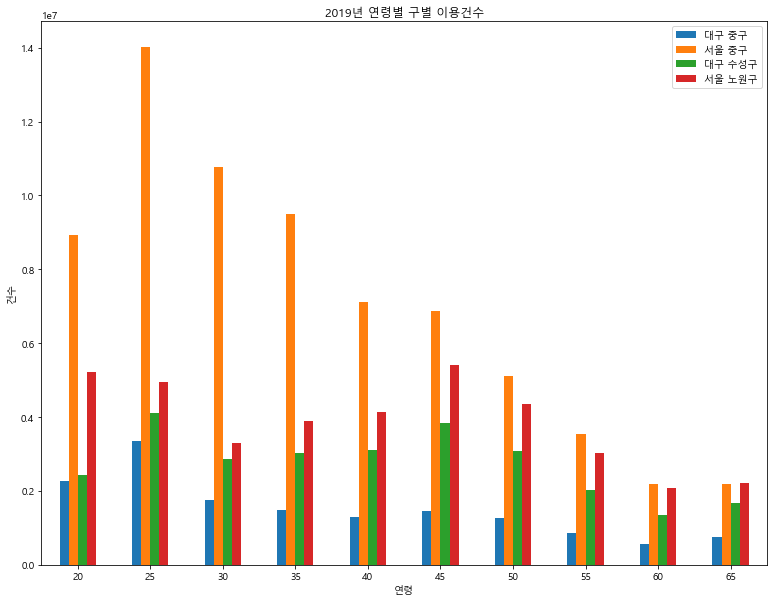

In [21]:
gu_age_rs19.T.plot.bar(rot=0, figsize=(13,10))
plt.title("2019년 연령별 구별 이용건수")
plt.xlabel("연령")
plt.ylabel("건수")
plt.legend([key for (key, value) in sorted(gu.items(), key=lambda x: x[1])])
plt.show()

In [22]:
gu_age_rs20 = pd.pivot_table(cs_rsdnt.query('STD_DD.dt.year == 2020'),
                             values='USE_CNT',
                             index='GU_CD',
                             columns='AGE_CD',
                             aggfunc=np.sum)

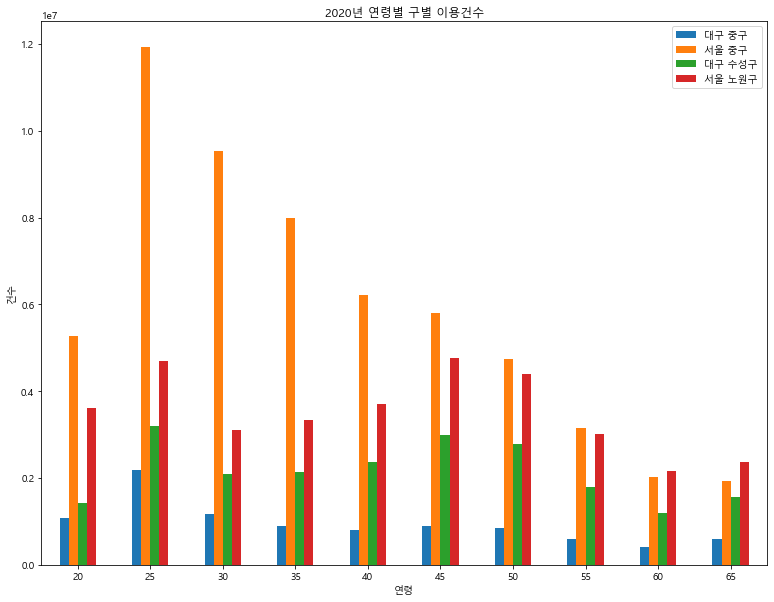

In [23]:
gu_age_rs20.T.plot.bar(rot=0, figsize=(13,10))
plt.title("2020년 연령별 구별 이용건수")
plt.xlabel("연령")
plt.ylabel("건수")
plt.legend([key for (key, value) in sorted(gu.items(), key=lambda x: x[1])])
plt.show()

<b> 여기부터 추가

In [26]:
amt_age19 = pd.pivot_table(cs_rsdnt.query('STD_DD.dt.year == 2019'),
                             values='USE_AMT',
                             index='GU_CD',
                             columns='AGE_CD',
                             aggfunc=np.sum)

In [28]:
amt_age20 = pd.pivot_table(cs_rsdnt.query('STD_DD.dt.year == 2020'),
                             values='USE_AMT',
                             index='GU_CD',
                             columns='AGE_CD',
                             aggfunc=np.sum)

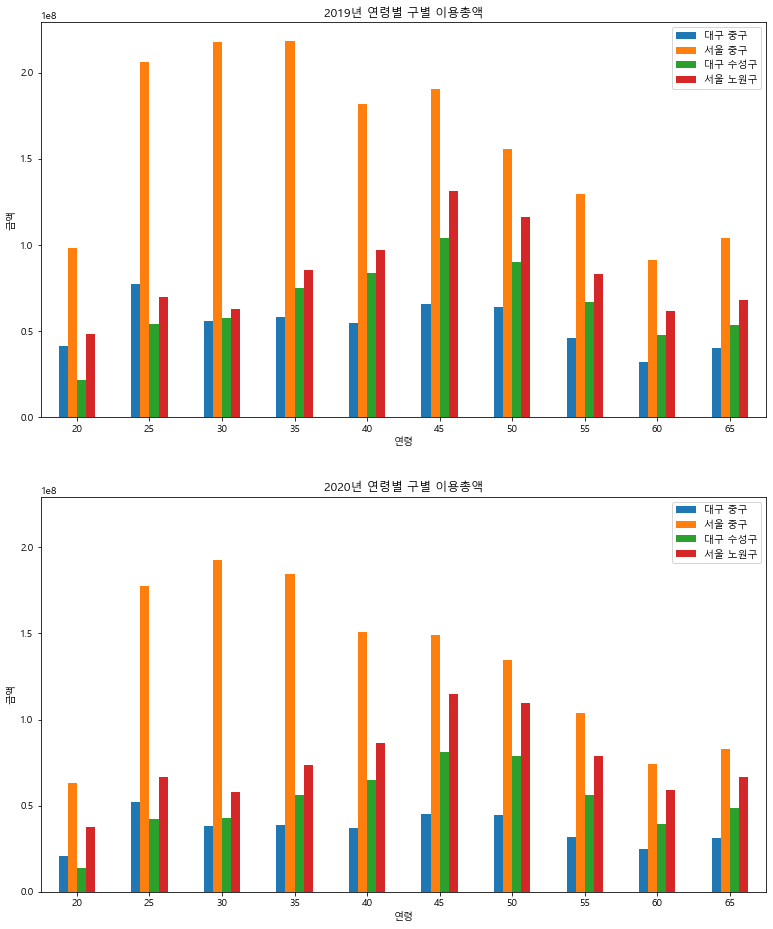

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(13, 16), sharey=True)


amt_age19.T.plot.bar(rot=0, ax=ax[0])
amt_age20.T.plot.bar(rot=0, ax=ax[1])

for i in range(2):
    ax[i].set_title(f"{i+2019}년 연령별 구별 이용총액")
    ax[i].set_xlabel("연령")
    ax[i].set_ylabel("금액")
    ax[i].legend([key for (key, value) in sorted(gu.items(), key=lambda x: x[1])])

plt.show()

In [37]:
cs_rsdnt['year'] = cs_rsdnt['STD_DD'].dt.year
cs_rsdnt['month'] = cs_rsdnt['STD_DD'].dt.month
cs_rsdnt['date'] = cs_rsdnt['STD_DD'].apply(lambda x:x.strftime('%m/%d'))

In [38]:
cs_rsdnt.head(3)

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,date
0,2019-02-01,110,110517,10,F,25,11,595,2019,2,02/01
1,2019-02-01,110,110517,10,F,50,5,243,2019,2,02/01
2,2019-02-01,110,110517,10,F,55,5,27,2019,2,02/01


In [39]:
amt_year = pd.pivot_table(cs_rsdnt,
                             values='USE_AMT',
                             index='year',
                             columns='AGE_CD',
                             aggfunc=np.sum)

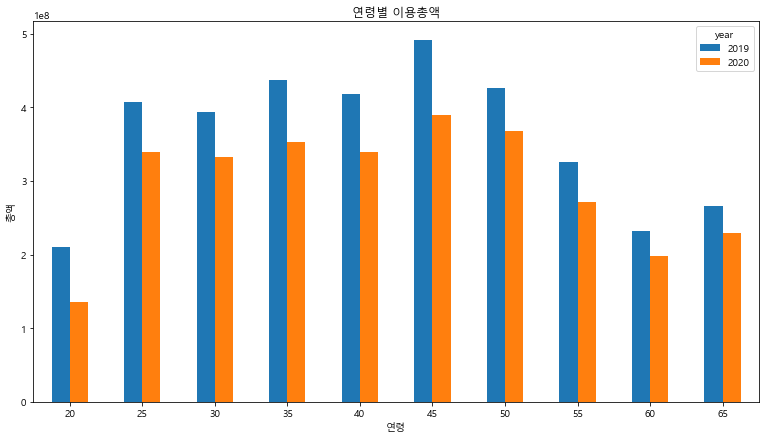

In [41]:
amt_year.T.plot.bar(rot=0, figsize=(13,7))
plt.title("연령별 이용총액")
plt.xlabel("연령")
plt.ylabel("총액")
plt.show()

In [42]:
cnt_year = pd.pivot_table(cs_rsdnt,
                             values='USE_CNT',
                             index='year',
                             columns='AGE_CD',
                             aggfunc=np.sum)

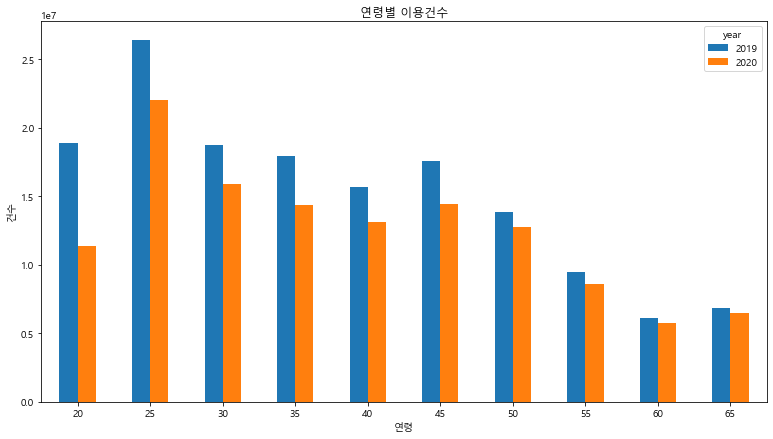

In [43]:
cnt_year.T.plot.bar(rot=0, figsize=(13,7))
plt.title("연령별 이용건수")
plt.xlabel("연령")
plt.ylabel("건수")
plt.show()

In [47]:
mct_year_amt = pd.pivot_table(cs_rsdnt,
                             values='USE_AMT',
                             index='year',
                             columns='MCT_CAT_CD',
                             aggfunc=np.sum)

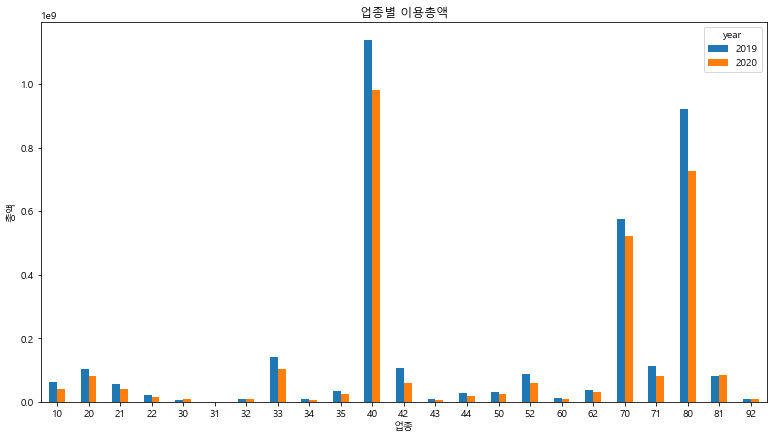

In [48]:
mct_year_amt.T.plot.bar(rot=0, figsize=(13,7))
plt.title("업종별 이용총액")
plt.xlabel("업종")
plt.ylabel("총액")
plt.show()

In [49]:
#중복코드
def code_dict(df, code, name):
    """
    code를 key로, name을 value로 하는 딕셔너리 생성함수
    """
    key = df[code].tolist()
    value = df[name].tolist()
    
    return {key[i]: value[i] for i in range(len(key))}

index 바꾸기

In [50]:
mct_year_cnt = pd.pivot_table(cs_rsdnt,
                             values='USE_CNT',
                             index='year',
                             columns='MCT_CAT_CD',
                             aggfunc=np.sum)

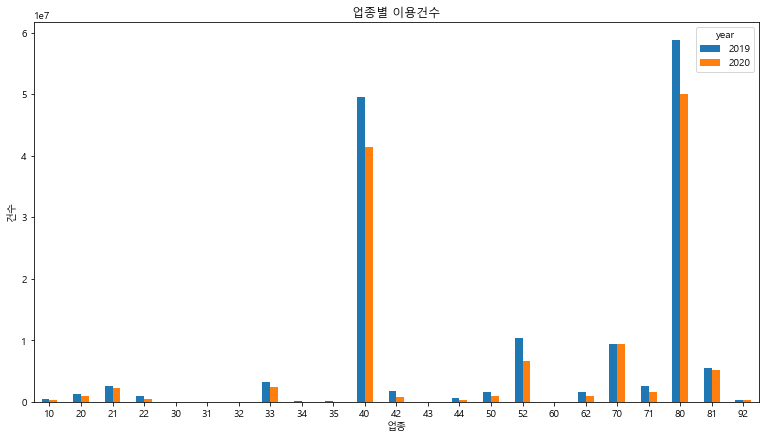

In [51]:
mct_year_cnt.T.plot.bar(rot=0, figsize=(13,7))
plt.title("업종별 이용건수")
plt.xlabel("업종")
plt.ylabel("건수")
plt.show()

In [52]:
cs_rsdnt['mean'] = cs_rsdnt['USE_AMT']/cs_rsdnt['USE_CNT']

In [54]:
mct_year_mean = pd.pivot_table(cs_rsdnt,
                             values='mean',
                             index='year',
                             columns='MCT_CAT_CD',
                             aggfunc=np.mean)

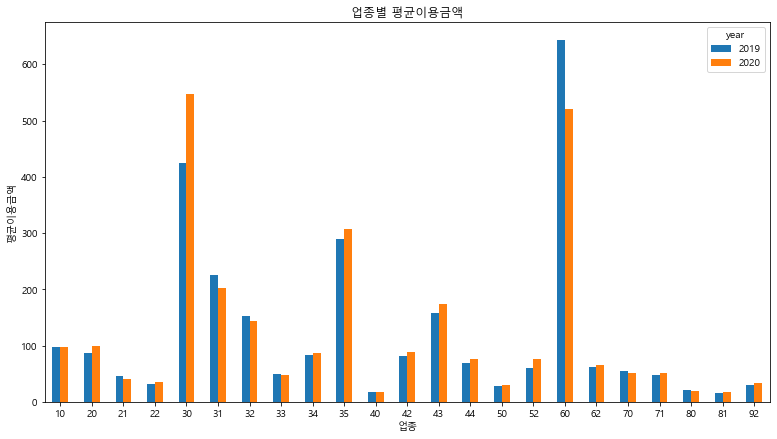

In [55]:
mct_year_mean.T.plot.bar(rot=0, figsize=(13,7))
plt.title("업종별 평균이용금액")
plt.xlabel("업종")
plt.ylabel("평균이용금액")
plt.show()